# Census Analysis

### Contents
1. Data Wrangling -- collect, organize, define, clean
2. Exploratory Data Analysis

The goal of this project is to predict income levels based on data collected in the US census. The income levels are binned at below 50K and above 50K. This is a biniary classification problem.
The full dataset will be split into two parts. One for training at 2/3 of the full set. And the other for testing at 1/3 of the full set.

**Initial Data Wrangling and Data Collection**

### Alternate Hypothesis

Education, age, and sex have an affect on a persons income level.

After confirming one of the above hypotheses the way will be opened to perform some prediction models based on useful columns in the dataset.

**Initial Data Collection and Clean**

In [45]:
# Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

In [46]:
# Loading in data as csv file
census = pd.read_csv('data/census-data.csv', header=None)

In [47]:
census.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [48]:
census.shape

(199523, 42)

In [49]:
census.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

**Data Definition**

In [50]:
# Creating list of column names to apply to dataframe
column_names = ['age', 'worker_class', 'industry_recode', 'occupation_recode', 'education',
                'wage_per_hour', 'edu_enroll_last_week', 'marital_stat', 'industry_code',
                'occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_union', 'reason_unemployment',
                'employment_stat', 'capital_gains', 'capital_losses', 'stock_divs', 'tax_filler_stat',
                'region_prev_residence', 'state_prev_residence', 'household_family_stat', 'household_summary_in',
                'instance_weight', 'migration_code_change_msa', 'migration_code_change_reg',
                'migration_codemove_reg', 'in_house_one_yearago', 'migration_prev_res_sunbelt', 'persons_worked_for_employer',
                'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth', 
                'citizenship', 'own_business_or_self_employed', 'veterans_questionnaire', 'veterans_benefits', 
                'weeks_worked_year', 'year', 'income']

In [51]:
# Setting column names for both data sets
census.columns = column_names

**Overview**

There are a total of 42 columns in this data set. The goal here would be to determine the viablity of each column as it pertains to the project analysis. Some of these columns might not be usable in this analysis. While others will need some wrangling to ensure that are used appropriately.

What variables could affect the income level of an indivudial?
- age 
- race
- industry
- occupation
- education
- hours worked
- marital status
- region
- dependants


There are likely more variables that play into this, but this is a good start point for now.

In [52]:
# checking unique values
census.income.unique()

array([' - 50000.', ' 50000+.'], dtype=object)

In [53]:
# assigning 1 or 0 based on income category
census.income = pd.Series(np.where(census.income.values == ' 50000+.', 1, 0),
                       census.index)

# sanity check
print(census.income.value_counts())

0    187141
1     12382
Name: income, dtype: int64


In [54]:
# dropping irrelevant columns
census.drop(columns=['industry_recode', 'occupation_recode', 'weeks_worked_year'], inplace=True)

The majority of the population are under 40 years of age. 
Persons under 16 will most likely not be making an income and therefore are not applicable to this particluar problem.

In [55]:
# removed entries under the age of 16
census = census[census.age >= 18]

In [56]:
census.shape

(143531, 39)

Here the education column is getting reorganized and cleaned for analysis

In [57]:
census['education'] = census.loc[:, ('education')].str.replace(' ', '')
census.education.unique()

array(['Highschoolgraduate', 'Somecollegebutnodegree', '10thgrade',
       'Bachelorsdegree(BAABBS)', 'Mastersdegree(MAMSMEngMEdMSWMBA)',
       'Lessthan1stgrade', 'Associatesdegree-academicprogram',
       '7thand8thgrade', '12thgradenodiploma',
       'Associatesdegree-occup/vocational',
       'Profschooldegree(MDDDSDVMLLBJD)', '5thor6thgrade', '11thgrade',
       'Doctoratedegree(PhDEdD)', '9thgrade', '1st2nd3rdor4thgrade'],
      dtype=object)

Cleaning and organizing the age column.

- NoHighschool = 10thgrade, Lessthan1stgrade, 7thand8thgrade, 12thgradenodiploma, 5thor6thgrade, 11thgrade, 9thgrade, 1st2nd3rdor4thgrade

- Highschool = Highschoolgraduate, Somecollegebutnodegree
- AssociatesDegree = Associatesdegree-academicprogram, Associatesdegree-occup/vocational
- BachelorsDegree = Bachelorsdegree(BAABBS)
- MastersDegree = Mastersdegree(MAMSMEngMEdMSWMBA)
- MedSchool = Profschooldegree(MDDDSDVMLLBJD)
- DoctorateDegree = Doctoratedegree(PhDEdD)

In [58]:
# creating a set of variable for replacing the old values in the education column
noHighSchool = ['10thgrade', 'Lessthan1stgrade', '7thand8thgrade', 
                '12thgradenodiploma', '5thor6thgrade', '11thgrade', '9thgrade', '1st2nd3rdor4thgrade']

highschool = ['Highschoolgraduate', 'Somecollegebutnodegree']

associates = ['Associatesdegree-academicprogram', 'Associatesdegree-occup/vocational']
BachelorsDegree = 'Bachelorsdegree(BAABBS)'
MastersDegree = 'Mastersdegree(MAMSMEngMEdMSWMBA)'
MedSchool = 'Profschooldegree(MDDDSDVMLLBJD)'
DoctorateDegree = 'Doctoratedegree(PhDEdD)'

In [59]:
# Replacing old values with new
for i in noHighSchool:
    census.loc[census.education == i, 'education'] = 'NoHighSchool'
    
for i in highschool:
    census.loc[census.education == i, 'education'] = 'HighSchool'

for i in associates:
    census.loc[census.education == i, 'education'] = 'AssociatesDegree'

census.loc[census.education == 'Bachelorsdegree(BAABBS)', 'education'] = 'BachelorsDegree'
census.loc[census.education == 'Mastersdegree(MAMSMEngMEdMSWMBA)', 'education'] = 'MastersDegree'
census.loc[census.education == 'Profschooldegree(MDDDSDVMLLBJD)', 'education'] = 'MedSchool'
census.loc[census.education == 'Doctoratedegree(PhDEdD)', 'education'] = 'DoctorateDegree'

In [60]:
census.education.unique()

# Success!

array(['HighSchool', 'NoHighSchool', 'BachelorsDegree', 'MastersDegree',
       'AssociatesDegree', 'MedSchool', 'DoctorateDegree'], dtype=object)

[Text(0.5, 0, 'Education'), Text(0, 0.5, 'Count')]

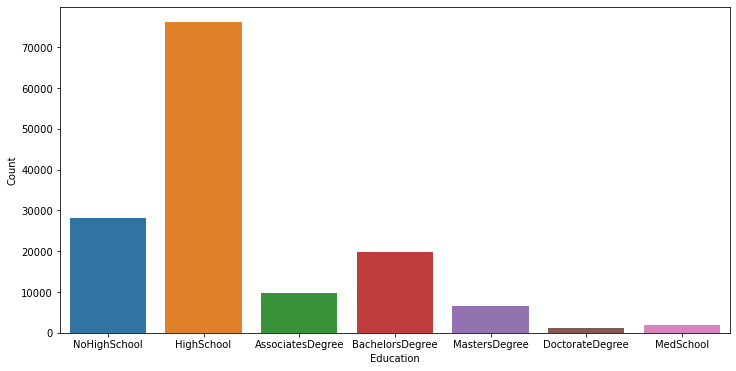

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
order = ['NoHighSchool', 'HighSchool', 'AssociatesDegree', 'BachelorsDegree', 'MastersDegree', 'DoctorateDegree', 'MedSchool']

sns.countplot(x='education', data=census, order=order)
ax.set(xlabel='Education', ylabel='Count')

In [62]:
census['year'].value_counts()

95    71811
94    71720
Name: year, dtype: int64

Is the census year relavent? 

In [63]:
incomes_94 = census.loc[census.year == 94, 'income'].value_counts()
incomes_95 = census.loc[census.year == 95, 'income'].value_counts()

print('1995 census income category counts\n')
print(incomes_95)
print('\n1994 income category counts\n')
print(incomes_94)
print('\nThe difference between years. Remember the value of 1 denotes more than 50,000.\n')
print(incomes_95 - incomes_94)

1995 census income category counts

0    65269
1     6542
Name: income, dtype: int64

1994 income category counts

0    65882
1     5838
Name: income, dtype: int64

The difference between years. Remember the value of 1 denotes more than 50,000.

0   -613
1    704
Name: income, dtype: int64


In [64]:
census.age.describe()

count    143531.000000
mean         44.688249
std          17.649001
min          18.000000
25%          31.000000
50%          42.000000
75%          57.000000
max          90.000000
Name: age, dtype: float64

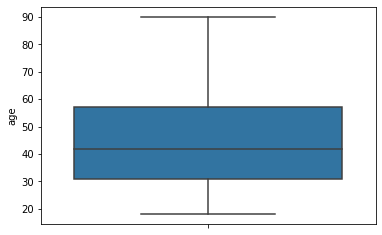

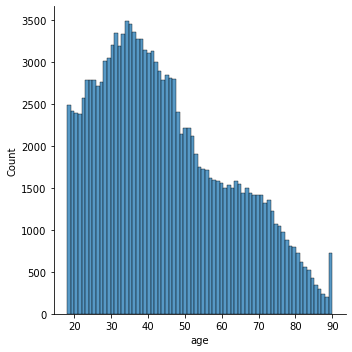

In [65]:
fig, ax = plt.subplots()
sns.boxplot(y='age', data=census)
sns.displot(x='age', data=census)

In [66]:
census.race.value_counts()

 White                          122663
 Black                           13204
 Asian or Pacific Islander        4133
 Other                            2149
 Amer Indian Aleut or Eskimo      1382
Name: race, dtype: int64

According to some research the African American population accounted for about 13% of the total.
But for some reason this data does not represent that. Here the percentage is closer to 9%
This could be a prime example of issues that come with sampling. This specific data set is the US Census, not a well thought out and properly conducted experiment. 

In [67]:
# removing extra whitespace
census['sex'] = census.loc[:, ('sex')].str.replace(' ', '')

In [68]:
census.sex.value_counts()

Female    76407
Male      67124
Name: sex, dtype: int64

In [69]:
census.loc[census['sex'] == 'Female', 'income'].value_counts()


0    73746
1     2661
Name: income, dtype: int64

In [70]:
2663/76547

0.03478908383084902

76547 Females in this survey made less than 50k\
2663 Females made more than 50k\
\
The percentage of female earners above 50k is 3.48%

In [71]:
census.loc[census['sex'] == 'Male', 'income'].value_counts()


0    57405
1     9719
Name: income, dtype: int64

In [72]:
9719/60246

0.1613219134880324

60246 Males made less than 50k\
9719 Males made more than 50k\
\
The percentage of male earners above 50k is 16.13%

In [73]:
census.employment_stat.unique()

array([' Not in labor force', ' Children or Armed Forces',
       ' Full-time schedules', ' Unemployed full-time',
       ' Unemployed part- time', ' PT for non-econ reasons usually FT',
       ' PT for econ reasons usually PT',
       ' PT for econ reasons usually FT'], dtype=object)

In [74]:
census.employment_stat.value_counts()

 Children or Armed Forces              72106
 Full-time schedules                   39761
 Not in labor force                    23793
 PT for non-econ reasons usually FT     3272
 Unemployed full-time                   2267
 PT for econ reasons usually PT         1205
 Unemployed part- time                   604
 PT for econ reasons usually FT          523
Name: employment_stat, dtype: int64

Below the values of the employment_stat column will be reassigned to numerical values in order to simplify and make modeling easier.  


0 = Unemployed


1 = Employed Full Time


2 = Employed Part Time

3 = Armed Forces or Children

4 = Not in Labor Force... Most likely meaning elderly or disabled

In [77]:
census.loc[(census.employment_stat == ' Full-time schedules'),'employment_stat'] = 1
census.loc[(census.employment_stat == ' Children or Armed Forces'),'employment_stat'] = 3
census.loc[(census.employment_stat == ' Not in labor force'),'employment_stat'] = 4
census.loc[(census.employment_stat == ' PT for non-econ reasons usually FT'),'employment_stat'] = 2
census.loc[(census.employment_stat == ' Unemployed full-time'),'employment_stat'] = 0
census.loc[(census.employment_stat == ' PT for econ reasons usually PT'),'employment_stat'] = 2
census.loc[(census.employment_stat == ' PT for econ reasons usually FT'),'employment_stat'] = 2
census.loc[(census.employment_stat == ' Unemployed part- time'),'employment_stat'] = 0

In [78]:
# Sanity Check
census.employment_stat.value_counts()

3    72106
1    39761
4    23793
2     5000
0     2871
Name: employment_stat, dtype: int64

# Unfortunately

It appears as though our data might be skewed...
There are significantly more military individuals than you would expect from census data.

In [94]:
census.age[census.employment_stat == 3].describe()

count    72106.000000
mean        44.557942
std         17.687397
min         18.000000
25%         30.000000
50%         41.000000
75%         57.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:>

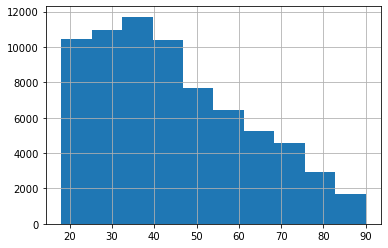

In [95]:
census.age[census.employment_stat == 3].hist()

In [107]:
census.veterans_benefits[census.employment_stat == 3].value_counts()

2    71117
1      989
Name: veterans_benefits, dtype: int64

In [113]:
census.veterans_benefits[census.employment_stat == 3].unique()

array([2, 1], dtype=int64)

The above counted values of the veterans benefits column shows that indeed all but 989 individuals has benefits. Which would indicate service in the armed forces.

In [108]:
census.veterans_questionnaire[census.employment_stat == 3].value_counts()

 Not in universe    71117
 No                   793
 Yes                  196
Name: veterans_questionnaire, dtype: int64

In [110]:
# Lets remove the veterans_questionnaire column as it does not appear to have any value to this analysis.

census = census.drop(columns='veterans_questionnaire')

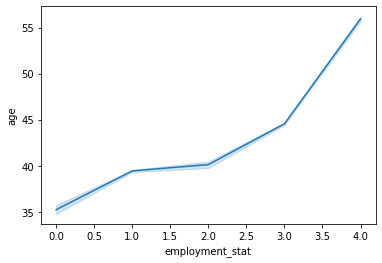

In [88]:
# Here I will check the age of all those that fall into the Armed Forces or Children category just to be sure it is as it should be.

ax = sns.lineplot(x='employment_stat', y='age', data=census)